Introduction to Regression w NNs

Predict y from x


In [ ]:
# Import TensorFlow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


#### Creating data to view and fit

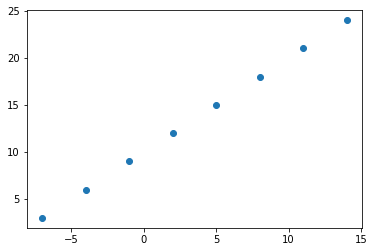

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Create features
x = np.array([-7, -4, -1, 2, 5, 8, 11, 14])
x = tf.cast(x, dtype=tf.float32)

# Create labels
y = np.array([3, 6, 9, 12, 15, 18, 21, 24])
y = tf.cast(y, dtype=tf.float32)

# Visualize it
plt.scatter(x, y)

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price predicton problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

In [ ]:
# Turn out NumPy arrays into tensors
x = tf.constant(x)
y = tf.constant(y)
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = x[0].shape
output_shape = y[0].shape
# If printed, they each have no shape because they are scalars(rank 0 meanning no dimensions)
# If you just did x.shape and y.shape, we don't want the input and the output to have 8 neurons
# We just want on x to have an output y(so 1 input and output)

## Modeling with TensorFlow

1. Create a model
2. Compile a model
3. Fitting a model(let the NN to find the patterns between the X and the Y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
              metrics=["mae"]
              )

#3. Fit the model
model.fit(x, y, epochs=100, shuffle=True)

Epoch 1/100
1/1 [==============================] - 0s 473ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 3m

In [ ]:
# Try and make a prediction
model.predict([17.])

array([[30.158512]], dtype=float32)

## Improving our model

1. Add more layers, increase the number of neurons within each hidden layer, or change the activation functions of each layer.
2. Change the optimization function or perhaps the learning rate of the optimization function.
3. Increase number of epochs or give the model more data points to learn from.

In [ ]:
# Let's rebuild our model

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

#3. Fit the model
model.fit(x, y, epochs=100, shuffle=True) # Changed number of epochs.

Epoch 1/100
1/1 [==============================] - 0s 239ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 3

In [ ]:
# Try and make a prediction
model.predict([17.])

array([[29.739855]], dtype=float32)

In [ ]:
# Let's see if we can make another to improve our model

#1. Create the model (this time with an extra hidden layer)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation=None),
  tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.02), # Learning rate is probably the most 
                                                           # important hyperparameter in a NN(when it is 0.02, it is good)
              metrics=["mae"])

#3. Fit the model
model.fit(x, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 414ms/step - loss: 12.0109 - mae: 12.0109
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1401 - mae: 10.1401
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 8.1880 - mae: 8.1880
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 7.0161 - mae: 7.0161
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 7.5338 - mae: 7.5338
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 7.2996 - mae: 7.2996
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 6.8547 - mae: 6.8547
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 6.2775 - mae: 6.2775
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 6.1667 - mae: 6.1667
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 6.2302 - mae: 6.2302
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 5

In [ ]:
# Try and make a prediction
model.predict([17.])
# This has a really bad result but during training(keeping everything the same but you have a 100 unit dense relu), the mae is actually really small
# This result is due to overfitting the data during training.

array([[26.784716]], dtype=float32)

## Evaluating a model

In practice, a typical workflow when building NNs is:

``` 
Build a model -> fit it -> evaluate it -> tweak the model -> fit it -> evaluate it -> . . . 
```

In [ ]:
# Make a bigger dataset
x = tf.range(-100, 100, 4)

In [ ]:
# Make labels for the dataset
y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

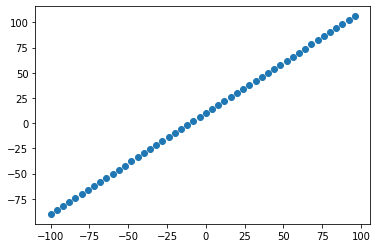

In [ ]:
# Visualize the data
plt.scatter(x, y)

## The 3 Sets . . .

* Training Set(70-80%)
* Validation Set(10-15%)
* Test Set(10-15%)

In [ ]:
# Split the data into train and test sets
x_train = x[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

x_test = x[40:] # last 10 are testing samples(20% of the data)
y_test = y[40:]

len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## Visualizing data

Now we've got our data in training and test sets. Visualize again.

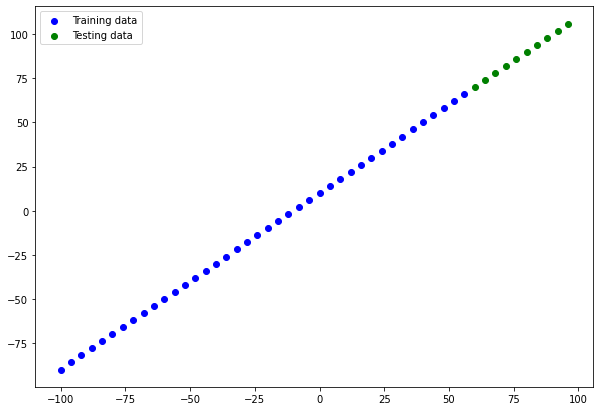

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(x_train, y_train, c="b", label="Training data")
plt.scatter(x_test, y_test, c="g", label="Testing data")
# Show legend
plt.legend()

In [ ]:
# Let's have a look at how to build a NN

#1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                            
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
# model.fit(x_train, y_train, epochs=100)

## Visualizing the model

In [ ]:
# Let's create a model which builds automatically by defining 
# the input shape in the first layer
tf.random.set_seed(42)

# Create a model(same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")    
  # 10 is the number of neurons in that layer.
  # Input shape=1 means that there is one nueron in the layer before
  # connecting to the current layer.                  
], name="First_Model")

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["mae"])


In [ ]:
model.summary()

Model: "First_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters(patterns) the model can update as it trains.
* Non-training params - these parameters aren't updated during training (this is typical when you bring in already learned model-importing a model)

In [ ]:
# Let's fit our model to the training data
model.fit(x_train, y_train, epochs=100, verbose=0)

In [ ]:
# Get summary of our model
model.summary()

Model: "First_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


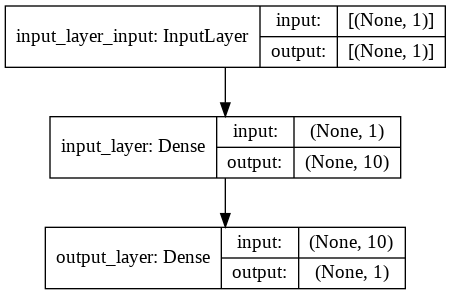

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

## Visualizing out model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels. 

Often you'll see this in the form of y_test or y_true versus y_pred(ground truth versus your models prediction)

In [ ]:
# Make some predictions
y_pred = model.predict(x_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot models predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()

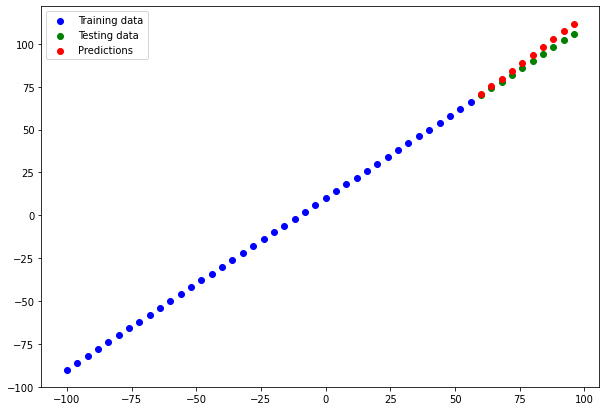

In [ ]:
plot_predictions(train_data=x_train,
                 train_labels=y_train,
                 test_data=x_test,
                 test_labels=y_test,
                 predictions=y_pred)

## Evaluating our model's predictions with regression evaluation metrics

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [ ]:
# Evaluate the model on the test
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 125ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
# y_pred has one extra dimension than y_test so we have to make them
# the same dimension. Have to squeeze(removes all one dimensions of an array).
mae = tf.keras.losses.MAE(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [ ]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [ ]:
# Make some functions to reuse MAE and MSE
def MAE(y_true, y_pred):
  return tf.keras.losses.MAE(y_test, tf.squeeze(y_pred))

def MSE(y_true, y_pred):
  return tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))

## Running experiments to improve our model

***TWEAK TIME:***

1. Get more data to train on
2. Make your model larger(using more hidden nuerons or hidden layers)
3. Train for longer.

***Let's do 3 experiments***

1. Original model
2. 2 layers trained with 100 epochs
3. 2 layers trained for 500 epochs.

***Model 1***

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                               
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(x_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - l

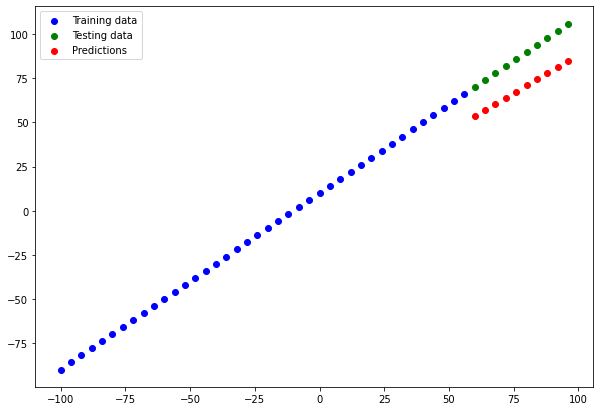

In [ ]:
# Make and plot the predictions for model_1
y_preds_1 = model_1.predict(x_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = MAE(y_test, y_preds_1)
mse_1 = MSE(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

***Model 2***

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                               
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(x_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mse: 1334.8956
Epoch 4/100
2/2 [==============================] - 0s 21ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [=========================

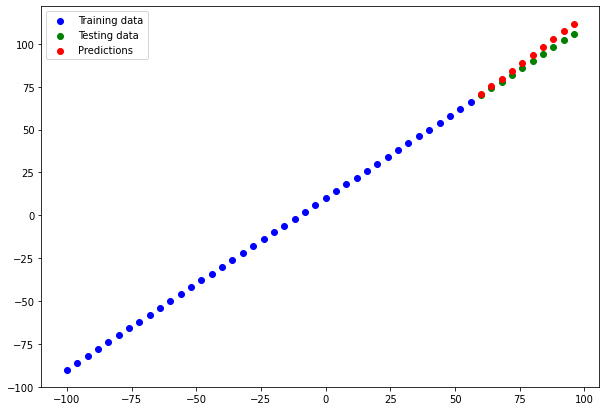

In [ ]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(x_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = MAE(y_test, y_preds_2)
mse_2 = MSE(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

***Model 3***

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),                               
])

# 2. Compile the model
model_3.compile(loss=tf.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(x_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 3ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 3ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 5ms

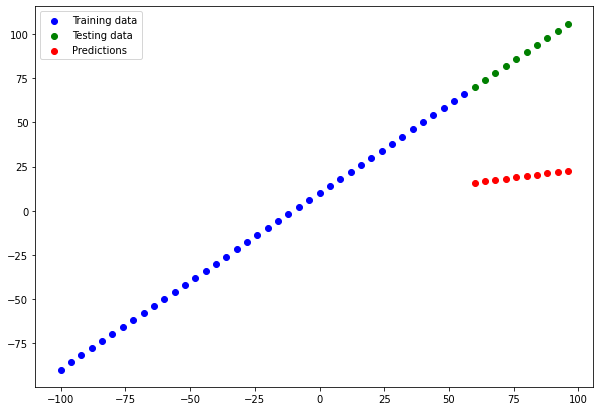

In [ ]:
# Make and plot some predictions
y_preds_3 = model_3.predict(x_test)
plot_predictions(predictions=y_preds_3) # Hella overfitting

In [ ]:
# Calculate model_3 evaluation metrics
mae_3 = MAE(y_test, y_preds_3)
mse_3 = MSE(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

## Comparing the results of our experiments

Let's compare the results of our experiments

In [ ]:
# Let's compare our model's results using a pandas DataFrame
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])                 
all_results                

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


## Tracking your experiments

One really good habit in machine learning modeling is tracking the results of your experiments. This can be slow so there are tools to help us:

1. TensorBoard
2. Weights & Biases

## Saving our models

Saving models lets us use them outside of Google Colab

There are two main ways to save:

1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format model predictions 
model_2_preds = model_2.predict(x_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(x_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(x_test)
loaded_h5_model_preds = loaded_h5_model.predict(x_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other model) from Google Colab

If you want to download your files from Colab:

1. Go to files and right click then download
2. Use code below
3. Use google drive

In [ ]:
# Download a file form Google Colab
from google.colab import files
files.download("/content/best_model_SavedModel_format")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Larger Example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance["bmi"], insurance["sex"]
# If you run the code above, you can see that different inputs have different types
# For example, bmi is a float while sex is an object
# ALL NN INPUTS HAVE TO BE NUMERICAL so to turn the objects into numbers,
# you have to use one-hot encoding to numerically encode non-numbers

(0       27.900
 1       33.770
 2       33.000
 3       22.705
 4       28.880
          ...  
 1333    30.970
 1334    31.920
 1335    36.850
 1336    25.800
 1337    29.070
 Name: bmi, Length: 1338, dtype: float64, 0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object)

In [ ]:
# Let's try one-hot encode our DataFrame so they are all numbers
insurance_onehot = pd.get_dummies(insurance)
insurance_onehot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
# Create x and y values (features and labels)
x = insurance_onehot.drop("charges", axis=1)
y = insurance_onehot["charges"]
x.head(), y.head()

(   age     bmi  children  ...  region_northwest  region_southeast  region_southwest
 0   19  27.900         0  ...                 0                 0                 1
 1   18  33.770         1  ...                 0                 1                 0
 2   28  33.000         3  ...                 0                 1                 0
 3   33  22.705         0  ...                 1                 0                 0
 4   32  28.880         0  ...                 1                 0                 0
 
 [5 rows x 11 columns], 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(x), len(x_train), len(x_test)

(1338, 1070, 268)

In [ ]:
# Build a NN (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                       
])

# 2. Compile the model
insurance_model.compile(loss=tf.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(x_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7589.9849 - mae: 7589.9849
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7496.7783 - mae: 7496.7783
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7493.1743

In [ ]:
# Check the results of the insurance_model on the test data
insurance_model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

## Let's try and improve our model

1. Add an extra layer with more hidden units and Adam optimizer
2. Same as above and train for longer

In [ ]:
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                         
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(x_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [ ]:
# Evaluate the larger model
insurance_model_2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.4961 - mae: 4924.4961


[4924.49609375, 4924.49609375]

In [ ]:
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                         
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(x_train, y_train, epochs=200)

In [ ]:
# Evaluate the model
insurance_model_3.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3488.7854 - mae: 3488.7854


[3488.785400390625, 3488.785400390625]

Text(0.5, 0, 'epochs')

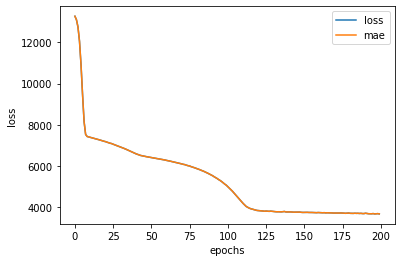

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalization and standardization)

Neural Nets prefer normalized inputs.

AxesSubplot(0.125,0.125;0.775x0.755)


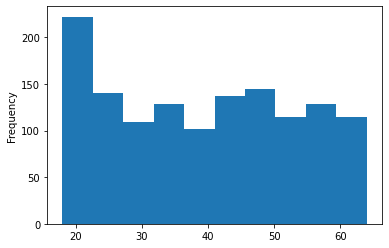

In [ ]:
print(x["age"].plot(kind="hist"))
# This histogram is not normal so we got to make it normal

In [ ]:
# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create our column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # Turn all these values to between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create x and y
x = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the column transformer to our traingin data
ct.fit(x_train)

# Transform training and test data wiht normalization (MinMaxScaler) and OneHotEncoder) 
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [ ]:
# What does our data look like now?
print(x_train.loc[0]) # Takes the first row

x_train.shape, x_train_normal.shape

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object


((1070, 6), (1070, 11))

In [ ]:
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                       
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(x_train_normal, y_train, epochs=100)

In [ ]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]